In [1]:
# Source: 
#   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.vonmises.html
#   https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.vonmises_line.html
# Reference: https://en.wikipedia.org/wiki/Von_Mises_distribution

# vonmises() is a circular distribution which does not restrict the distribution to a fixed interval.
# vonmises_line() is the same distribution, defined on [-\pi, \pi].

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import vonmises, vonmises_line

import inspect


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

def log(*argv, show=False):
    for arg in argv:
        print(f"-"*75)
        print(f"{retrieve_name(arg)}")
        if show:
            print(f"content: ")
            print(arg)
        print(f"type: {type(arg)}")
        if isinstance(arg, np.ndarray) or isinstance(arg, torch.Tensor): 
            print(f"dtype: {arg.dtype}")
            print(f"shape: {arg.shape}")
        elif isinstance(arg, list) or isinstance(arg, str) or isinstance(arg, dict):
            print(f"len: {len(arg)}")

In [2]:
loc = 0.43*np.pi  # circular mean
kappa = 1.5       # concentration 

print(f"one random 'vonmises' sample: {vonmises.pdf(loc, kappa, 0)}") 
print(f"one random 'vonmises_line' sample: {vonmises_line.pdf(loc, kappa, 0)}") 

number_of_samples = 1000
samples = vonmises_line(loc=loc, kappa=kappa).rvs(number_of_samples)
log(samples[:30])

one random 'vonmises' sample: 0.13406244608404877
one random 'vonmises_line' sample: 0.13406244608404877
---------------------------------------------------------------------------
[]
type: <class 'numpy.ndarray'>
dtype: float64
shape: (30,)


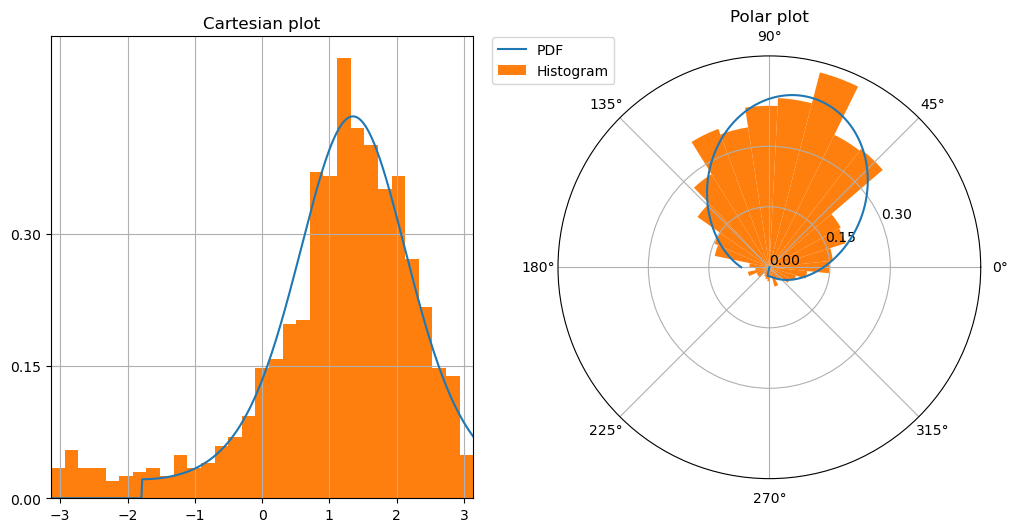

In [3]:
fig = plt.figure(figsize=(12, 6))
left  = plt.subplot(121)
right = plt.subplot(122, projection='polar')
x = np.linspace(-np.pi, np.pi, 500)

vonmises_pdf = vonmises_line.pdf(loc, kappa, x)

ticks = [0, 0.15, 0.3]

left.plot(x, vonmises_pdf)
left.set_yticks(ticks)
number_of_bins = int(np.sqrt(number_of_samples))
left.hist(samples, density=True, bins=number_of_bins)
left.set_title("Cartesian plot")
left.set_xlim(-np.pi, np.pi)
left.grid(True)

right.plot(x, vonmises_pdf, label="PDF")
right.set_yticks(ticks)
right.hist(samples, density=True, bins=number_of_bins, label="Histogram")
right.set_title("Polar plot")
right.legend(bbox_to_anchor=(0.15, 1.06))

plt.show()

In [4]:
import torch
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
PI = torch.tensor(np.pi, dtype=torch.float32, device=device)
log(PI)

from torch import distributions as dist

loc_mu = 0.43*PI
kappa_PE = torch.tensor(1.5, dtype=torch.float32, device=device)
dist.VonMises(loc_mu, kappa_PE).sample(sample_shape=(16,))


---------------------------------------------------------------------------
['PI']
type: <class 'torch.Tensor'>
dtype: torch.float32
shape: torch.Size([])


tensor([ 2.1757,  2.0646,  2.6802,  1.1320,  1.0296,  2.4174,  1.4144,  1.2882,
         2.1232,  2.9199,  1.7922,  0.9640,  1.1391, -2.3877,  1.5765,  0.8775],
       device='cuda:0')